# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [5]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set= df_train.iloc[:, 1:2].values

### Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [9]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [16]:
rnn_regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [17]:
rnn_regressor.add(LSTM(units= 50, return_sequences= True, input_shape= (x_train.shape[1], 1)))
rnn_regressor.add(Dropout(0.2))

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [18]:
rnn_regressor.add(LSTM(units= 50, return_sequences= True))
rnn_regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [19]:
rnn_regressor.add(LSTM(units= 50, return_sequences= True))
rnn_regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [20]:
rnn_regressor.add(LSTM(units= 50))
rnn_regressor.add(Dropout(0.2))

### Adding the output layer

In [21]:
rnn_regressor.add(Dense(units=1))

### Compiling the RNN

In [22]:
rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [24]:
rnn_regressor.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0013
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0013
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0015
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0013
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0013    
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0014
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0014
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0017
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0016
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0014
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0012    
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0013
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0014    
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0013
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [25]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price= df_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [26]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = rnn_regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


### Visualising the results

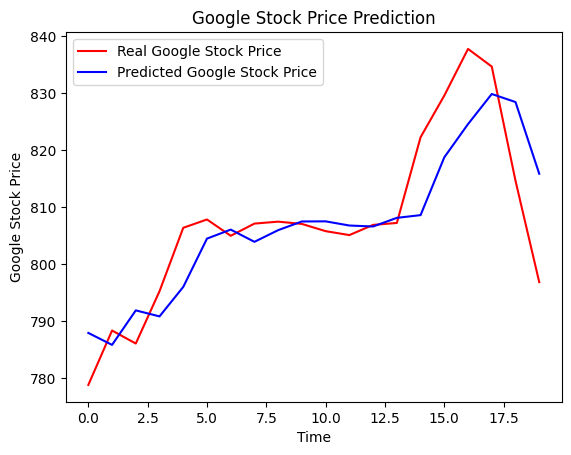

In [27]:
plt.plot(real_stock_price, c= 'r', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, c= 'b', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [29]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

8.178838163521709
